In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('qn_traindata.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.sample(10)

id    qid1    qid2  \
140370  140370  223077  223078   
152548  152548  239660  239661   
5639      5639   11083   11084   
236508  236508    9036    9899   
147893  147893  233304  233305   
18777    18777   35545   35546   
398055  398055  531253  531254   
159024  159024  248314  248315   
86286    86286  145554  145555   
153721  153721    6937  241230   

                                                question1  \
140370            Is two jio card activate on same phone?   
152548                   How do I get a job at Capgemini?   
5639      What is the most translated video in the world?   
236508  What is the quickest possible way to lose weight?   
147893  Is use of the term "America" or "American" to ...   
18777    Which is your favorite Malayalam movie dialogue?   
398055  Is Thomas Edison State College nationally accr...   
159024  How is funneling effect accounted in a simplif...   
86286   Is it safe to take your dog outside before its...   
153721  How will Trump’s presidency affect internation...   

                                                question2  is_duplicate  
140370                           WHO IS LOVE ON IN WORLD?             0  
152548                 How do you get a job at Capgemini?             1  
5639                    Can someone translate this video?             0  
236508  What is the fastest way to lose weight success...             1  
147893  How frustrated are Canadians, Mexicans and peo...             0  
18777                     What are best Malayalam movies?             0  
398055         Is Thomas Edison State College accredited?             1  
159024  Who's most hot perfomers of Hollywood pop sing...             0  
86286   What happens if a person not bitten by dog tak...             0  
153721  Can I own a gun in USA being an international ...             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

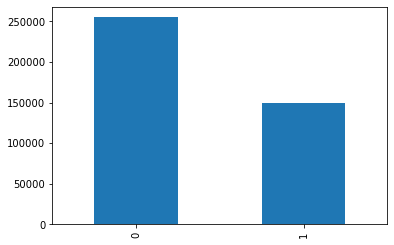

In [8]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


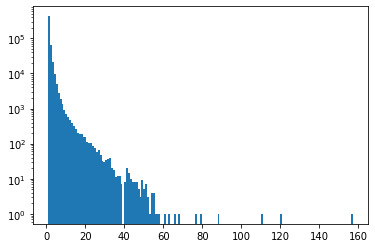

In [10]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

## Apply Bag_Of_Words on both question1 & question2 columns & apply Random forest & XGBoost algorithm to check accuracy

In [11]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [12]:
new_df = df.sample(30000)

In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
new_df.duplicated().sum()

0

In [16]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
99735           What does right side chest pain indicate?   
250198       What causes stool color to change to yellow?   
120053                            Why do we have poverty?   
238574  Is it okay to have a girlfriend between 1-5 ye...   
279392  What is the current gross annual salary of the...   

                                                question2  
99735   Why do l feel pain in the right side of the ch...  
250198  What does yellow stool mean? How should it be ...  
120053                    What are the causes of poverty?  
238574  Do you believe most of the incidents on life e...  
279392  Why does our United States President have to b...

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [18]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [19]:
temp_df

0     1     2     3     4     5     6     7     8     9     ...  2990  \
99735      0     0     0     0     0     0     0     0     0     0  ...     0   
250198     0     0     0     0     0     0     0     0     0     0  ...     0   
120053     0     0     0     0     0     0     0     0     0     0  ...     0   
238574     0     0     0     0     0     0     0     0     0     0  ...     0   
279392     0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
140296     0     0     0     0     0     0     0     0     0     0  ...     0   
303277     0     0     0     0     0     0     0     0     0     0  ...     0   
71841      0     0     0     0     0     0     0     0     0     0  ...     0   
215761     0     0     0     0     0     0     0     0     0     0  ...     0   
242746     0     0     0     0     0     0     0     0     0     0  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
99735      0     0     0     0     0     0     0     0     0  
250198     0     0     0     0     0     0     0     0     0  
120053     0     0     0     0     0     0     0     0     0  
238574     0     1     0     0     0     0     0     0     0  
279392     0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
140296     0     0     0     0     0     0     0     0     0  
303277     0     0     0     0     0     0     0     0     0  
71841      0     1     0     0     0     0     0     0     0  
215761     0     1     0     0     0     0     0     0     0  
242746     0     0     0     0     0     1     0     0     0  

[30000 rows x 6000 columns]

In [20]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [21]:
temp_df.head()

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
99735   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
250198  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
120053  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
238574  0  0  0  0  0  0  0  0  0  0  ...     0     1     0     0     0     0   
279392  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
99735      0     0     0             1  
250198     0     0     0             0  
120053     0     0     0             1  
238574     0     0     0             0  
279392     0     0     0             0  

[5 rows x 6001 columns]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7405

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7245

### Bag of Words with Preprocessing & Advanced features

In [26]:
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735           What does right side chest pain indicate?   
250198       What causes stool color to change to yellow?   
120053                            Why do we have poverty?   
238574  Is it okay to have a girlfriend between 1-5 ye...   
279392  What is the current gross annual salary of the...   

                                                question2  is_duplicate  
99735   Why do l feel pain in the right side of the ch...             1  
250198  What does yellow stool mean? How should it be ...             0  
120053                    What are the causes of poverty?             1  
238574  Do you believe most of the incidents on life e...             0  
279392  Why does our United States President have to b...             0

In [27]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [28]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [29]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [30]:
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  
99735   why do l feel pain in the right side of the chest             1  
250198  what does yellow stool mean  how should it be ...             0  
120053                     what are the causes of poverty             1  
238574  do you believe most of the incidents on life e...             0  
279392  why does our united states president have to b...             0

In [31]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [32]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
99735       40      49             7            12  
250198      43      53             8            11  
120053      22      30             5             6  
238574      64     120            14            22  
279392      70      73            12            14

In [33]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [34]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
99735       40      49             7            12            4  
250198      43      53             8            11            3  
120053      22      30             5             6            1  
238574      64     120            14            22            1  
279392      70      73            12            14            4

In [35]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [36]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
99735       40      49             7            12            4          18  
250198      43      53             8            11            3          18  
120053      22      30             5             6            1          11  
238574      64     120            14            22            1          34  
279392      70      73            12            14            4          23

In [37]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
99735       40      49             7            12            4          18   
250198      43      53             8            11            3          18   
120053      22      30             5             6            1          11   
238574      64     120            14            22            1          34   
279392      70      73            12            14            4          23   

        word_share  
99735         0.22  
250198        0.17  
120053        0.09  
238574        0.03  
279392        0.17

In [43]:
# Advanced Features
from nltk.corpus import stopwords

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paresh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [48]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [49]:
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
99735       40      49             7            12  ...          18   
250198      43      53             8            11  ...          18   
120053      22      30             5             6  ...          11   
238574      64     120            14            22  ...          34   
279392      70      73            12            14  ...          23   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
99735         0.22  0.799984  0.666656  0.000000  0.000000  0.571420   
250198        0.17  0.499988  0.399992  0.499975  0.166664  0.374995   
120053        0.09  0.999900  0.499975  0.000000  0.000000  0.199996   
238574        0.03  0.000000  0.000000  0.124998  0.111110  0.071428   
279392        0.17  0.749981  0.428565  0.249994  0.124998  0.333331   

         ctc_max  last_word_eq  first_word_eq  
99735   0.333331           0.0            0.0  
250198  0.299997           0.0            1.0  
120053  0.166664           1.0            0.0  
238574  0.045454           0.0            0.0  
279392  0.285712           0.0            0.0  

[5 rows x 21 columns]

In [51]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [52]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [53]:
new_df.head()

id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
99735       40      49             7            12  ...  0.666656  0.000000   
250198      43      53             8            11  ...  0.399992  0.499975   
120053      22      30             5             6  ...  0.499975  0.000000   
238574      64     120            14            22  ...  0.000000  0.124998   
279392      70      73            12            14  ...  0.428565  0.249994   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
99735   0.000000  0.571420  0.333331           0.0            0.0   
250198  0.166664  0.374995  0.299997           0.0            1.0   
120053  0.000000  0.199996  0.166664           1.0            0.0   
238574  0.111110  0.071428  0.045454           0.0            0.0   
279392  0.124998  0.333331  0.285712           0.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
99735            5.0       9.5              0.292683  
250198           2.0       9.0              0.159091  
120053           1.0       5.5              0.347826  
238574           8.0      18.0              0.061538  
279392           2.0      13.0              0.338028  

[5 rows x 24 columns]

In [55]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [56]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [57]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
99735    99735  165531  165532   
250198  250198  364011  364012   
120053  120053  194789  101130   
238574  238574  349973  349974   
279392  279392  398824  398825   

                                                question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  is_duplicate  \
99735   why do l feel pain in the right side of the chest             1   
250198  what does yellow stool mean  how should it be ...             0   
120053                     what are the causes of poverty             1   
238574  do you believe most of the incidents on life e...             0   
279392  why does our united states president have to b...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
99735       40      49             7            12  ...  0.333331   
250198      43      53             8            11  ...  0.299997   
120053      22      30             5             6  ...  0.166664   
238574      64     120            14            22  ...  0.045454   
279392      70      73            12            14  ...  0.285712   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
99735            0.0            0.0           5.0       9.5   
250198           0.0            1.0           2.0       9.0   
120053           1.0            0.0           1.0       5.5   
238574           0.0            0.0           8.0      18.0   
279392           0.0            0.0           2.0      13.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
99735               0.292683          52                  58   
250198              0.159091          42                  47   
120053              0.347826          62                  59   
238574              0.061538          35                  45   
279392              0.338028          43                  44   

        token_sort_ratio  token_set_ratio  
99735                 70               78  
250198                63               63  
120053                54               58  
238574                38               39  
279392                59               63  

[5 rows x 28 columns]

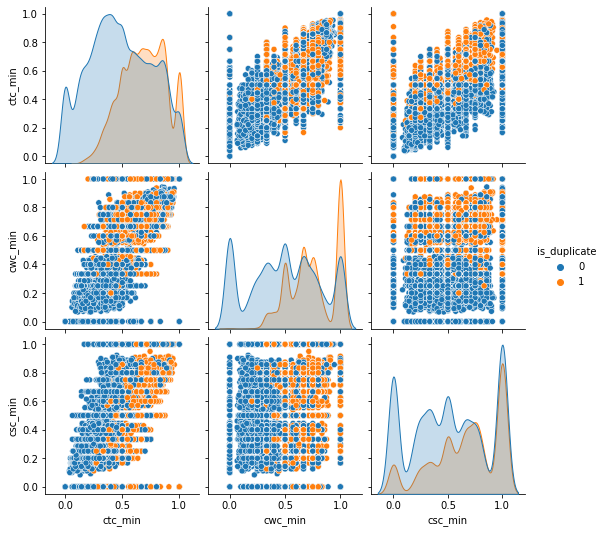

In [58]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

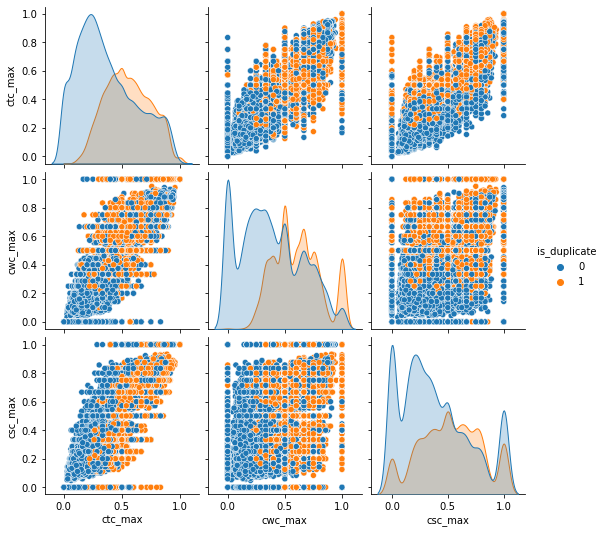

In [59]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

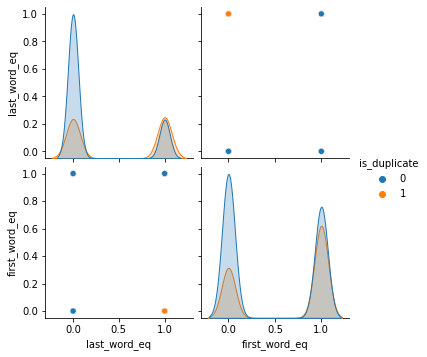

In [60]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

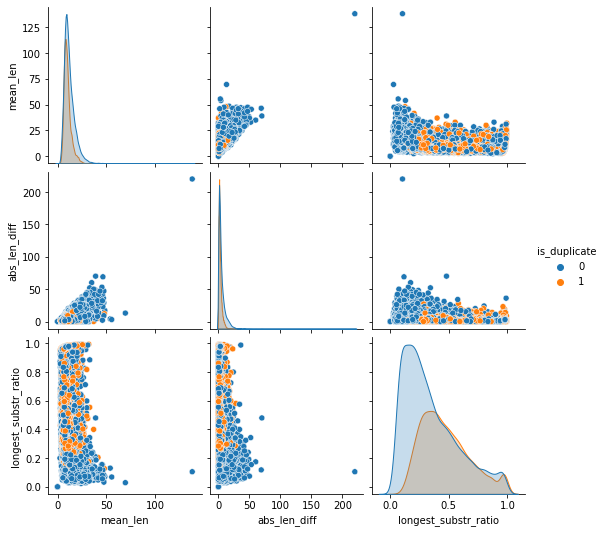

In [61]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

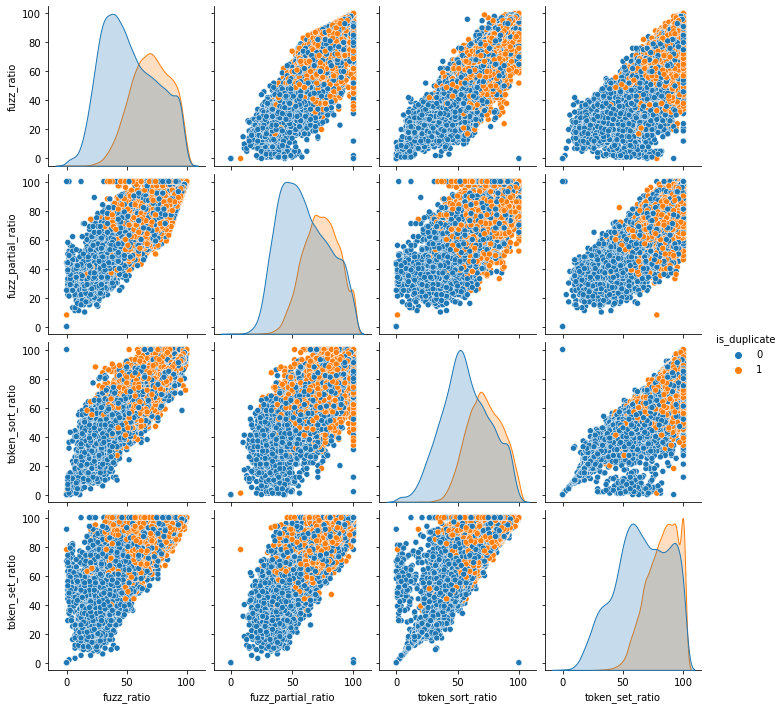

In [62]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [63]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [64]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.358s...
[t-SNE] Computed neighbors for 30000 samples in 6.881s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

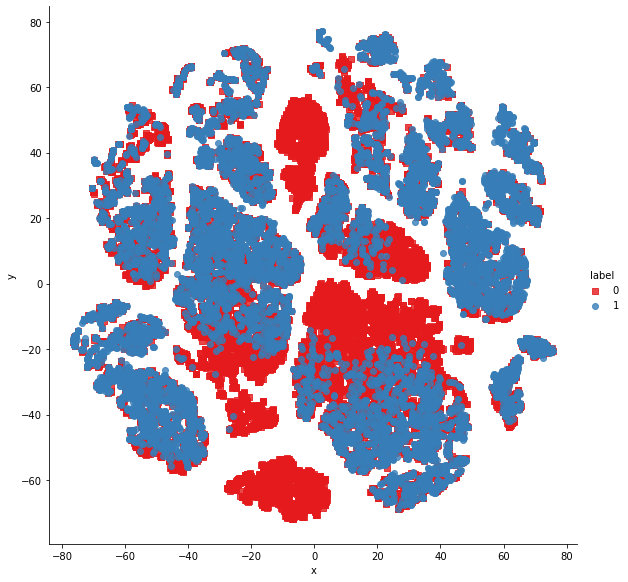

In [65]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [66]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.418s...
[t-SNE] Computed neighbors for 30000 samples in 6.536s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [68]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [69]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
99735            what does right side chest pain indicate   
250198        what causes stool color to change to yellow   
120053                             why do we have poverty   
238574  is it okay to have a girlfriend between 1 5 ye...   
279392  what is the current gross annual salary of the...   

                                                question2  
99735   why do l feel pain in the right side of the chest  
250198  what does yellow stool mean  how should it be ...  
120053                     what are the causes of poverty  
238574  do you believe most of the incidents on life e...  
279392  why does our united states president have to b...

In [70]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
99735              1      40      49             7            12            4   
250198             0      43      53             8            11            3   
120053             1      22      30             5             6            1   
238574             0      64     120            14            22            1   
279392             0      70      73            12            14            4   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
99735           18        0.22  0.799984  0.666656  ...  0.333331   
250198          18        0.17  0.499988  0.399992  ...  0.299997   
120053          11        0.09  0.999900  0.499975  ...  0.166664   
238574          34        0.03  0.000000  0.000000  ...  0.045454   
279392          23        0.17  0.749981  0.428565  ...  0.285712   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
99735            0.0            0.0           5.0       9.5   
250198           0.0            1.0           2.0       9.0   
120053           1.0            0.0           1.0       5.5   
238574           0.0            0.0           8.0      18.0   
279392           0.0            0.0           2.0      13.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
99735               0.292683          52                  58   
250198              0.159091          42                  47   
120053              0.347826          62                  59   
238574              0.061538          35                  45   
279392              0.338028          43                  44   

        token_sort_ratio  token_set_ratio  
99735                 70               78  
250198                63               63  
120053                54               58  
238574                38               39  
279392                59               63  

[5 rows x 23 columns]

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [72]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [73]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
99735              1      40      49             7            12            4   
250198             0      43      53             8            11            3   
120053             1      22      30             5             6            1   
238574             0      64     120            14            22            1   
279392             0      70      73            12            14            4   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
99735           18        0.22  0.799984  0.666656  ...     0     0     0   
250198          18        0.17  0.499988  0.399992  ...     0     0     0   
120053          11        0.09  0.999900  0.499975  ...     0     0     0   
238574          34        0.03  0.000000  0.000000  ...     0     0     1   
279392          23        0.17  0.749981  0.428565  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
99735      0     0     0     0     0     0     0  
250198     0     0     0     0     0     0     0  
120053     0     0     0     0     0     0     0  
238574     0     0     0     0     0     0     0  
279392     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7763333333333333

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7806666666666666

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3105,  613],
       [ 729, 1553]], dtype=int64)

In [79]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3060,  658],
       [ 658, 1624]], dtype=int64)

In [80]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [81]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [82]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [83]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [84]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [87]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [88]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [89]:
rf.predict(query_point_creator(q1,q4))

array([1], dtype=int64)

In [90]:
cv

CountVectorizer(max_features=3000)

In [91]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))